In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_predict

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_pickle("../../../data/Visual_well_being/merged_features.pickle")

In [126]:
response_columns = ['P', 'E', 'R', 'M', 'A', 'PERMA']
category_columns = ['gender', 'education', 'employed', 'income', 'participate']
Y = df[response_columns]
X = df.drop(response_columns + category_columns, axis=1)

In [127]:
y = Y['P']

In [128]:
model = GradientBoostingRegressor()

Optimal number of features : 48


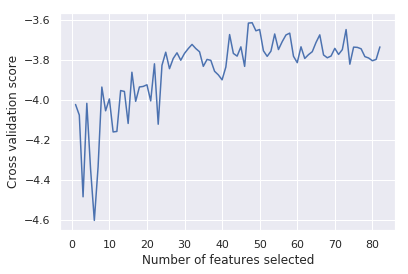

In [129]:
rfecv = RFECV(model, cv=3, step=1, scoring='neg_mean_squared_error')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [130]:
idx=[i for i in range(len(X.columns)) if rfecv.support_[i]]
X = X.iloc[:,idx]
print(X.columns)

Index(['age', 'user_followed_by', 'user_follows', 'user_posted_photos',
       'Person', 'Plant', 'Food', 'Collage', 'Outdoors', 'Book', 'Crowd',
       'Toy', 'Teddy Bear', 'Light', 'Sea Life', 'TV', 'Selfie', 'Woman',
       'Cocktail', 'Pool', 'Tattoo', 'Downtown', 'Musical Instrument',
       'Cafeteria', 'Breakfast', 'Child',
       'avg_number_of_faces_over_images_with_faces', 'avg_comments',
       'depressed_flt_pct', 'happy_to_depressed_flt_ratio',
       'avg_posts_early_day', 'avg_posts_late_day', 'avg_posts_early_night',
       'avg_posts_late_night', 'avg_posts_day', 'avg_posts_night',
       'avg_posts_whole_date', 'percentage_animals', 'CALM', 'SAD',
       'SURPRISED', 'ratio_male', 'ratio_female', 'cluster_0', 'cluster_1',
       'cluster_2', 'born', 'imagecount'],
      dtype='object')


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [132]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

158 48
Mean squared error: 2.77
Mean absolute error: 1.42
R2: 0.14


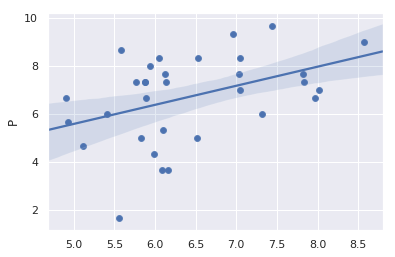

In [133]:
#y_predicted = cross_val_predict(model, X, y, cv=10)
y_predicted = model.predict(X_test)
sns.scatterplot(y_predicted, y_test)
sns.regplot(y_predicted, y_test)

r2 = r2_score(y_test, y_predicted)
n = len(df)
p = rfecv.n_features_
print (n, p)
adj_r_sqr = 1-(1-r2)*(n-1)/(n-p-1)

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predicted))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_predicted))
print('R2: %.2f' % r2)
#print('Adjusted R2: %.2f' % adj_r_sqr)

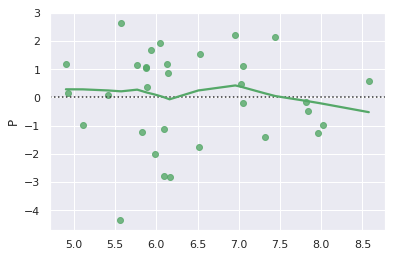

In [134]:
sns.residplot(y_predicted, y_test, lowess=True, color="g")

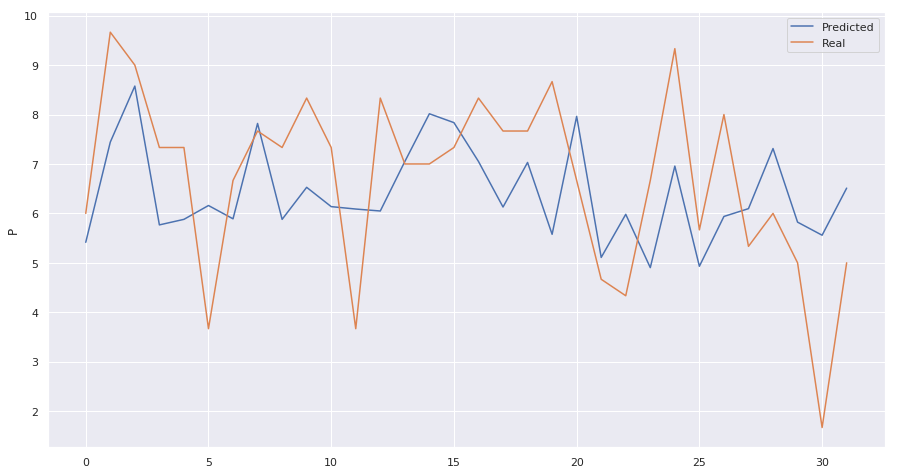

In [135]:
plt.figure(figsize=(15,8))
sns.lineplot(range(len(y_predicted)),y_predicted, label="Predicted")
sns.lineplot(range(len(y_test)),y_test, label="Real")